# Unit 5 - Financial Planning

In [1]:
pip install alpaca-trade-api

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
os.chdir('C:\\Users\\UxmaS\\Downloads\\Fintech')
os.getcwd()
path = os.path.join(os.getcwd(),".env")
load_dotenv(path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43045.43
The current value of your 5.3 ETH is $12416.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [9]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_investments = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   
...                           ...       ...       ...     ...      ...   
2023-06-12 04:00:00+00:00   98.09   98.1600   97.7300   98.14  5436273   
2023-06-13 04:00:00+00:00   98.48   98.4800   97.6001   97.68  9568596   
2023-06-14 04:00:00+00:00   97.88   97.9900   97.4499   97.77  8360159   
2023-06-15 04:00:00+00:00   98.29   98.4600   98.1337   98.45  7471994   
2023-06-16 04:00:00+00:00   98.09   98.2750   97.9050   98.14  4599777   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   
...                               ...         ...     ...       ...       ...   
2023-06-12 04:00:00+00:00       24139   97.959299  430.92  433.8800  430.1700   
2023-06-13 04:00:00+00:00       27973   97.819261  435.32  437.3300  434.6300   
2023-06-14 04:00:00+00:00       36242   97.793308  437.01  439.0612  433.5900   
2023-06-15 04:00:00+00:00       29262   98.355119  436.33  443.9000  436.2300   
2023-06-16 04:00:00+00:00       26718   98.118495  443.02  443.6078  438.9700   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956  
...                           ...        ...         ...         ...  
2023-06-12 04:00:00+00:00  433.80   76272808      523670  431.957032  
2023-06-13 04:00:00+00:00  436.66   95912772      673273  436.003879  
2023-06-14 04:00:00+00:00  437.18  100625477      712664  436.725442  
2023-06-15 04:00:00+00:00  442.60  110301302      748180  440.705812  
2023-06-16 04:00:00+00:00  439.46  110461387      619074  440.999282  

[788 rows x 14 columns]

In [10]:
# create dataframe
agg_close_price = pd.DataFrame()

spy_close_price = pd.DataFrame()

# Pick AGG and SPY close prices
agg_close_price["AGG"] = df_investments["AGG"]["close"]

spy_close_price["SPY"] = df_investments["SPY"]["close"]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $                              AGG
timestamp                        
2020-05-01 04:00:00+00:00  116.87
2020-05-04 04:00:00+00:00  116.97
2020-05-05 04:00:00+00:00  116.88
2020-05-06 04:00:00+00:00  116.41
2020-05-07 04:00:00+00:00  116.77
...                           ...
2023-06-12 04:00:00+00:00   98.14
2023-06-13 04:00:00+00:00   97.68
2023-06-14 04:00:00+00:00   97.77
2023-06-15 04:00:00+00:00   98.45
2023-06-16 04:00:00+00:00   98.14

[788 rows x 1 columns]
Current SPY closing price: $                              SPY
timestamp                        
2020-05-01 04:00:00+00:00  282.83
2020-05-04 04:00:00+00:00  283.59
2020-05-05 04:00:00+00:00  286.15
2020-05-06 04:00:00+00:00  284.34
2020-05-07 04:00:00+00:00  287.70
...                           ...
2023-06-12 04:00:00+00:00  433.80
2023-06-13 04:00:00+00:00  436.66
2023-06-14 04:00:00+00:00  437.18
2023-06-15 04:00:00+00:00  442.60
2023-06-16 04:00:00+00:00  439.46

[788 rows x 1 columns]


In [11]:
# Compute the current value of shares

my_spy_value = spy_close_price.tail(1)["SPY"].values[0] * my_spy

my_agg_value = agg_close_price.tail(1)["AGG"].values[0] * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")


The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 7500 

# Consolidate financial assets data
financial_assets = {
    "Car": 30000 ,
    "House": 500000 , 
    "Stocks": 70000 ,
    "Crypto" : 50000 ,
    "Savings" : 120000 
}

# Create savings DataFrame
df_savings = pd.DataFrame

df_savings = df_savings.from_dict(financial_assets, orient='index',columns=['amount'])
# Display savings DataFrame
display(df_savings)

,amount
Car,30000
House,500000
Stocks,70000
Crypto,50000
Savings,120000


In [13]:
# Plot savings pie chart
from matplotlib import pyplot as plt
import numpy as np

array([<AxesSubplot:ylabel='amount'>], dtype=object)

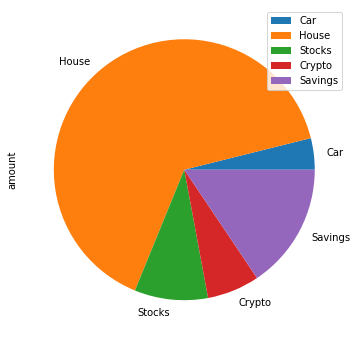

In [14]:
df_savings.plot.pie(subplots=True, figsize=(11,6))

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
def savings(month):
    m = 0 # needs to be outside because the while loop will reset it once it finishes running
    while m <= month:
        annual_savings = 1500 * m
        diff_remaining = emergency_fund - annual_savings

        if annual_savings >= emergency_fund:
            print ("Congratulations! You have enough money in your emergency fund.")
            break
        elif m == month:
            print (f"You need to save ${diff_remaining} until you save enough for your emergency fund.")
            break
        # print(m)
        m += 1

# Validate saving health by inputting the number of months you have been saving
savings(20)

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\UxmaS\Downloads\Fintech\api-part3\api-part3\homework-api\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997366,1.001039,1.005610,1.007237,1.010061,1.003903,1.001004,1.005707,0.994623,0.997954,...,0.998045,1.006420,1.004643,0.998814,1.001058,1.006091,0.998593,0.994082,0.992695,1.004644
2,0.994901,1.006858,1.011025,1.002992,1.019301,1.000066,1.002544,1.007541,0.991099,0.994952,...,1.009560,1.006517,1.008292,1.001533,0.994883,1.011959,1.000677,0.997310,0.993870,1.003701
3,0.994117,1.013146,1.010587,0.996352,1.018680,0.991906,1.000426,1.013694,0.992150,0.996943,...,1.014236,1.005894,1.009785,1.001735,0.991627,1.015477,0.998005,0.997051,0.996418,1.006823
4,0.993389,1.016835,1.015607,0.993629,1.017075,0.994050,1.006253,1.014962,0.998853,0.992739,...,1.019238,1.008684,1.000596,1.006363,0.990313,1.013751,0.995313,0.994339,1.004831,1.006189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.538268,3.583015,4.992685,8.945449,11.563509,14.202915,13.176113,7.394966,5.251332,5.140418,...,9.240711,2.540670,7.337745,5.176553,7.572994,4.087497,9.904854,2.182433,9.132136,7.965363
7557,9.595783,3.588694,4.981421,8.941039,11.577926,14.172076,13.237700,7.383854,5.242824,5.175521,...,9.311314,2.529044,7.363789,5.097737,7.588177,4.066888,9.867649,2.185241,9.090934,8.001407
7558,9.641322,3.549161,4.958918,8.921143,11.567556,14.247222,13.180450,7.358095,5.216049,5.156415,...,9.287974,2.544214,7.351307,5.108965,7.622374,4.086926,9.809393,2.202966,9.047610,8.021521
7559,9.601253,3.548338,4.963455,8.887912,11.566751,14.089356,13.362706,7.412081,5.190681,5.153153,...,9.216507,2.539043,7.380662,5.109052,7.661894,4.105267,9.837804,2.213042,9.008743,8.048615


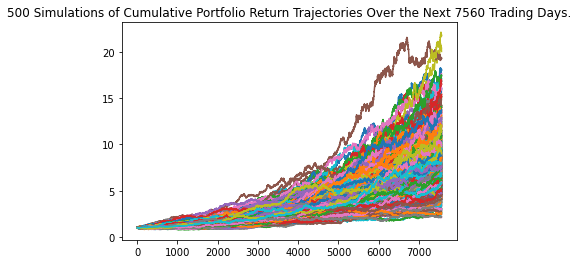

In [21]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

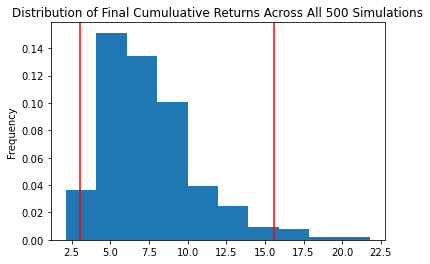

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.529860
std               3.090447
min               2.118015
25%               5.335099
50%               6.956603
75%               9.018724
max              21.812797
95% CI Lower      3.036996
95% CI Upper     15.595163
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60739.91 and $311903.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91109.87 and $467854.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


In [ ]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

In [ ]:
# Set initial investment
initial_investment_2 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

In [ ]:
# Set initial investment

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")